<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Time_Series_using_prophet_for_multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [4]:
ny_df = df.set_index('timeStamp')

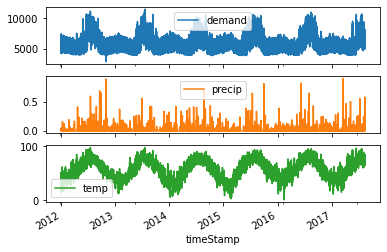

In [5]:
ny_df.plot(subplots=True);

In [6]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [7]:
ny_df_daily = ny_df.resample('D').mean()

In [8]:
from fbprophet import Prophet

In [9]:
ny_df_final =  ny_df_daily.reset_index()[['timeStamp', 'demand', 'temp']].rename({'timeStamp':'ds',
                                                                          'demand':'y', 
                                                                          'temp':'temp'}, axis='columns')

In [10]:
ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


In [11]:
ny_df_final.query('temp != temp')

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [14]:
ny_df_final['temp']=ny_df_final['temp'].fillna(method='ffill')

In [15]:
ny_df_final['month']=ny_df_final['ds'].dt.month

In [16]:
ny_df_final

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1
...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8
2047,2017-08-09,6811.112167,73.852500,8
2048,2017-08-10,5582.297000,75.217500,8
2049,2017-08-11,NaN,72.767917,8


In [18]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp', 'month'],
              title='NYC energy demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step='year', stepmode='backward'),
                      dict(count=2, label='3y', step='year', stepmode='backward'),
                      dict(count=3, label='5y', step='year', stepmode='backward')
        ])
    )
)
fig.show()

In [19]:
ny_df_final[['month', 'temp']].groupby('month').agg({'temp':('max','min','mean' )})

temp                      
             max        min       mean
month                                 
1      55.420455   9.507917  33.432140
2      59.360000   9.015000  34.517758
3      67.878333  20.291667  41.419884
4      72.992083  33.045833  52.600204
5      82.576250  48.090833  62.543994
6      86.916667  52.405833  71.334418
7      89.606667  66.417083  77.595627
8      87.426250  68.042083  75.525947
9      84.448750  57.274583  69.550306
10     74.277500  42.106250  58.642895
11     67.606250  27.172500  47.225638
12     64.735000  22.429583  41.520068

In [21]:
ny_df_final[['y', 'temp']].corr()

,y,temp
y,1.000000,0.560888
temp,0.560888,1.000000


In [22]:
ny_df_final.query('temp>80')[['y', 'temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [23]:
ny_df_final.query('temp<80')[['y', 'temp']].corr()

,y,temp
y,1.000000,0.470562
temp,0.470562,1.000000


In [24]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [25]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [26]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3,
                                 labels=False)

In [27]:
ny_df_final

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [28]:
train=ny_df_final[(ny_df_final['ds']>= '2012-01-01') & (ny_df_final['ds']<= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds']>'2017-04-30')]

In [29]:
train.shape

(1947, 6)

In [30]:
test.shape

(104, 6)

In [31]:
test

,ds,y,temp,month,summer_temp,month_bins
1947,2017-05-01,5417.231583,60.300833,5,0,1
1948,2017-05-02,5697.950042,67.537917,5,0,1
1949,2017-05-03,5354.628500,59.413333,5,0,1
1950,2017-05-04,5235.704833,54.877083,5,0,1
1951,2017-05-05,5358.639500,55.720833,5,0,1
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [33]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [34]:
model.add_regressor('summer_temp', standardize=False)
model.add_regressor('month_bins', standardize=False, mode='multiplicative')

In [35]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
model.params

OrderedDict([('k', array([[0.14760422]])),
             ('m', array([[0.58876607]])),
             ('delta',
              array([[-4.71416526e-08, -6.41586311e-06, -1.82744926e-01,
                      -1.67782383e-07, -1.74103167e-08,  1.22142120e-02,
                       7.69355196e-03,  2.98750794e-03,  9.89830150e-08,
                       3.31189176e-08, -3.32094703e-08, -3.81719061e-02,
                      -2.42237664e-05,  7.15586204e-08,  1.40721628e-01,
                       3.60042834e-07, -3.04861026e-07, -9.94059548e-02,
                      -4.33196683e-02,  3.01139014e-08,  6.19431008e-08,
                       5.68495201e-08,  3.76665581e-02,  2.84149406e-02,
                       1.32793754e-07]])),
             ('sigma_obs', array([[0.03884209]])),
             ('beta',
              array([[-0.03548167, -0.05910135,  0.04945314,  0.04015359, -0.00950002,
                      -0.00176236, -0.007792  , -0.00252906,  0.00343317, -0.00585251,
                 

In [37]:
future = model.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [38]:
future['summer_temp'] = ny_df_final['summer_temp']
future['month_bins'] = ny_df_final['month_bins']

In [39]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [42]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7383.695055,6558.745390,8127.064567
2047,2017-08-09,7394.540415,6627.881538,8237.936720
2048,2017-08-10,7364.877855,6551.528962,8116.384818
2049,2017-08-11,7314.672167,6546.937940,8100.956874
2050,2017-08-12,6733.792052,6006.591845,7510.676426


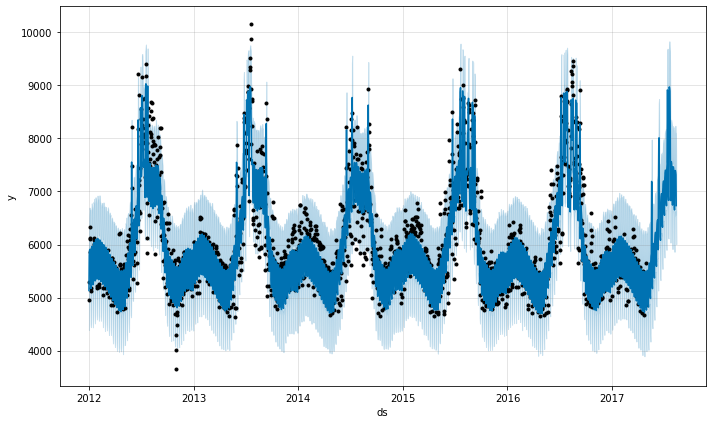

In [43]:
fig1 = model.plot(forecast)

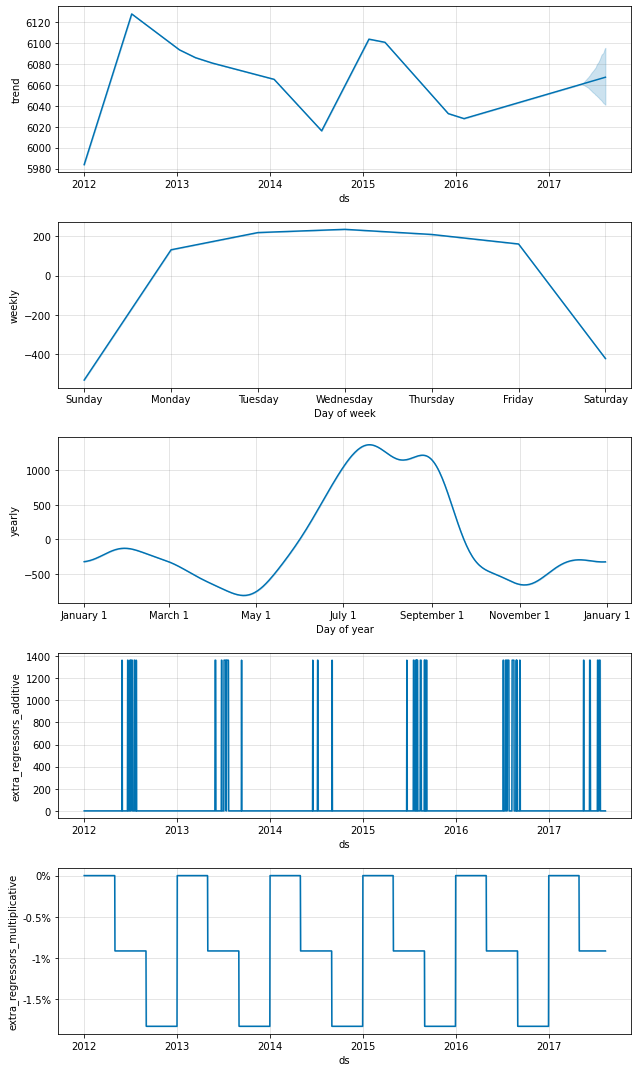

In [44]:
fig2 = model.plot_components(forecast)

In [47]:
from fbprophet.diagnostics import performance_metrics, cross_validation
cv_results = cross_validation(model=model, initial='731 days', horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,204293.922864,451.988853,352.610429,0.062543,0.051056,0.901099
1,37 days 00:00:00,210424.439085,458.720437,359.614485,0.063723,0.051274,0.895604
2,37 days 12:00:00,211653.376540,460.058014,361.875027,0.064102,0.051798,0.895604
3,38 days 00:00:00,215758.752010,464.498388,365.841034,0.064497,0.053251,0.890110
4,38 days 12:00:00,217944.760867,466.845543,369.633793,0.065097,0.054411,0.890110
...,...,...,...,...,...,...,...
653,363 days 00:00:00,156476.433386,395.571022,334.336980,0.061215,0.060978,0.983516
654,363 days 12:00:00,156952.382181,396.172162,334.121377,0.061178,0.060978,0.983516
655,364 days 00:00:00,160084.466586,400.105569,336.855265,0.061888,0.061735,0.978022
656,364 days 12:00:00,159558.111682,399.447258,335.652320,0.061691,0.061467,0.978022


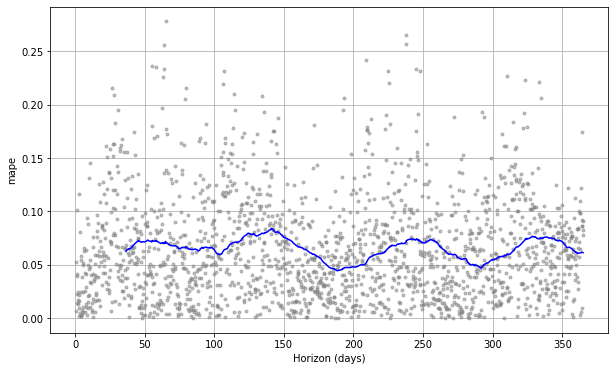

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')